# How to access NectarCAM data from the EGI grid directly using through DIRAC within `nectarchain` ?

In this short notebook, we will see how to access data stored on the grid through DIRAC within `nectarchain` itself, without the hassle of first manually downloading them locally.

In order to achieve this, you will obviously need a `conda` environment in which all relevant code is installed, such as `ctapipe`, `nectarchain`, but also `CTADIRAC` itself. Please refer to the `nectarchain` installation procedure at <https://github.com/cta-observatory/nectarchain> and follow the instructions to enable DIRAC support.

You will also need to have an active proxy for EGI, initialized e.g. with:

```
dirac-proxy-init -M -g ctao_nectarcam
```

You can also check whether you currently have an active proxy with the command `dirac-proxy-info`.

In [1]:
from nectarchain.data import DataManagement

In [15]:
dm = DataManagement()
dm.findrun(6881)

2025-10-03 08:29:13,718 nectarchain.data.management WARNING run 6881 is not present in /data/users/jlenain/tmp/runs/
NoneType: None


/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0000.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0001.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0002.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0003.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0004.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0005.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0006.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0007.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0008.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0009.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0010.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0011.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0012.fits.fz
/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM

(PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.*.fits.fz'),
 [PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0000.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0001.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0002.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0003.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0004.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0005.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0006.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0007.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0008.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0009.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0010.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0011.fits.fz'),
  PosixPath('/da

Once the files are downloaded, the same command will *not* fetch them again, but will detect that the data are already locally present:

In [16]:
dm.findrun(6881)

(PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.*.fits.fz'),
 [PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0000.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0001.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0002.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0003.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0004.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0005.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0006.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0007.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0008.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0009.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0010.fits.fz'),
  PosixPath('/data/users/jlenain/tmp/runs/NectarCAM.Run6881.0011.fits.fz'),
  PosixPath('/da

It is also possible to fetch data using the DIRAC API directly. Under the hood, this is exactly what is done within `nectarchain` in the example above.

In [17]:
from DIRAC.Interfaces.API.Dirac import Dirac

In [18]:
dirac = Dirac()

In [19]:
?dirac.getFile

Signature: dirac.getFile(lfn, destDir='', printOutput=False)
Docstring:
Retrieve a single file or list of files from Grid storage to the current directory. lfn is the
desired logical file name for the file, fullPath is the local path to the file and diracSE is the
Storage Element name for the upload.  The fileGuid is optional, if not specified a GUID will be
generated on the fly.

Example Usage:

>>> print(dirac.getFile('/lhcb/user/p/paterson/myFile.tar.gz'))
{'OK': True, 'Value':{'Failed': {},
 'Successful': {'/lhcb/user/p/paterson/test/myFile.tar.gz': '/afs/cern.ch/user/p/paterson/myFile.tar.gz'}}}

:param lfn: Logical File Name (LFN)
:type lfn: string
:param printOutput: Optional flag to print result
:type printOutput: boolean
:returns: S_OK,S_ERROR
File:      ~/local/opt/conda/envs/nectar-dev/lib/python3.11/site-packages/DIRAC/Interfaces/API/Dirac.py
Type:      method

In [20]:
lfns = [
    "/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0000.fits.fz",
    "/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0001.fits.fz",
]

In [28]:
import os

tmpdir = f"{os.environ['NECTARCAMDATA']}/runs"
if not os.path.isdir(tmpdir):
    print(f"{tmpdir} does not exist yet, I will create it for you")
    os.makedirs(tmpdir)

In [22]:
dirac.getFile(lfn=lfns, destDir=tmpdir, printOutput=True)

2025-10-03 08:36:30 UTC Framework/GFAL2_SRM2Storage/GFAL2_StorageBase._getSingleFile INFO: Trying to download srm://ccsrm02.in2p3.fr:8443/srm/managerv2?SFN=/pnfs/in2p3.fr/data/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0000.fits.fz to /tmp/jlenain/scratch/NectarCAM.Run6881.0000.fits.fz
2025-10-03 08:41:33 UTC Framework/GFAL2_HTTPSStorage/GFAL2_StorageBase._getSingleFile INFO: Trying to download https://eos.grif.fr:11000/eos/grif/cta/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0000.fits.fz to /tmp/jlenain/scratch/NectarCAM.Run6881.0000.fits.fz
2025-10-03 08:46:58 UTC Framework/GFAL2_SRM2Storage/GFAL2_StorageBase._getSingleFile INFO: Trying to download srm://ccsrm02.in2p3.fr:8443/srm/managerv2?SFN=/pnfs/in2p3.fr/data/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0001.fits.fz to /tmp/jlenain/scratch/NectarCAM.Run6881.0001.fits.fz
2025-10-03 08:46:58 UTC Framework/GFAL2_HTTPSStorage/GFAL2_StorageBase._getSingleFile INFO: Trying to download https:

{'OK': True,
 'Value': {'Successful': {'/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0000.fits.fz': '/tmp/jlenain/scratch/NectarCAM.Run6881.0000.fits.fz',
   '/ctao/nectarcam/NectarCAMQM/2025/20250722/NectarCAM.Run6881.0001.fits.fz': '/tmp/jlenain/scratch/NectarCAM.Run6881.0001.fits.fz'},
  'Failed': {}}}

**You are now ready to work with `ctapipe` as usual!**

In [35]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from traitlets.config import Config

from ctapipe.coordinates import EngineeringCameraFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay

/home/jlenain/local/opt/conda/envs/nectar-dev/lib/python3.11/site-packages/ctapipe/core/provenance.py:280: MissingReferenceMetadata: Could not read reference metadata for input file: /home/jlenain/local/src/python/cta-observatory/ctapipe_io_nectarcam/src/ctapipe_io_nectarcam/resources/Pulse_template_nectarCam_17042020.dat
  warnings.warn(
/home/jlenain/local/opt/conda/envs/nectar-dev/lib/python3.11/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


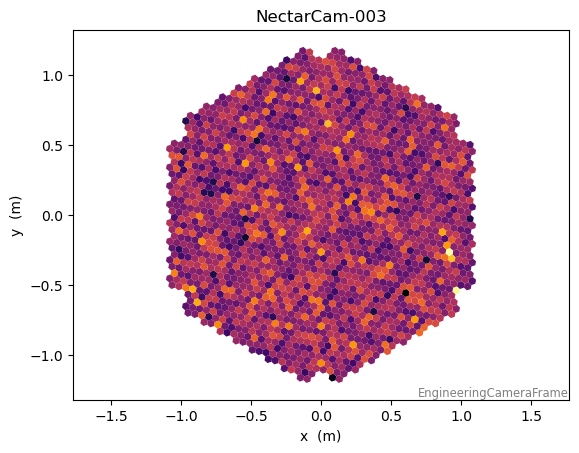

In [36]:
from glob import glob

path = glob(f"{tmpdir}/NectarCAM.*.fits.fz")
path.sort()

config = Config(
    dict(
        NectarCAMEventSource=dict(
            NectarCAMR0Corrections=dict(
                calibration_path=None,
                apply_flatfield=False,
                select_gain=False,
            )
        )
    )
)

reader = EventSource(input_url=path[0], config=config, max_events=100)

tel_id = reader.subarray.tel_ids[0]

# Get some event, and display camera charges for the high gain channel (no time window optimization)
evt = next(iter(reader))
image = evt.r0.tel[tel_id].waveform.sum(axis=2)
camera = reader.subarray.tel[tel_id].camera.geometry.transform_to(
    EngineeringCameraFrame()
)
disp = CameraDisplay(geometry=camera, image=image[0])